In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
pd.set_option('display.max_columns',None)
dt=pd.read_excel(r'C:\Users\admin\Downloads\employee_burnout_analysis-AI.xlsx')
dt

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


In [5]:
dt["Date of Joining"]=pd.to_datetime(dt["Date of Joining"])

In [6]:
dt.shape


(22750, 9)

In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [8]:
dt.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [9]:
dt.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [10]:
dt.isna().sum()


Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [11]:
dt.duplicated().sum()

0

In [12]:
dt.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [13]:
for i,col in enumerate(dt.columns):
  print(f"\n\n{dt[col].unique()}")
  print(f"\n{dt[col].value_counts()}\n\n")



['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: Employee ID, Length: 22750, dtype: int64




['2008-09-30T00:00:00.000000000' '2008-11-30T00:00:00.000000000'
 '2008-03-10T00:00:00.000000000' '2008-11-03T00:00:00.000000000'
 '2008-07-24T00:00:00.000000000' '2008-11-26T00:00:00.000000000'
 '2008-01-02T00:00:00.000000000' '2008-10-31T00:00:00.000000000'
 '2008-12-27T00:00:00.000000000' '2008-03-09T00:00:00.000000000'
 '2008-03-16T00:00:00.000000000' '2008-05-12T00:00:00.000000000'
 '2008-01-20T00:00:00.000000000' '2008-02-23T00:00:00.000000000'
 '2008-

In [14]:
dt=dt.drop(['Employee ID'],axis=1)


In [16]:
intFloatdt=dt.select_dtypes([np.int64,np.float64])
for i,col in enumerate(intFloatdt.columns):
  if (intFloatdt[col].skew()>=0.1):
    print("\n",col,"feature is positively skewed and value is:",intFloatdt[col].skew())
  elif (intFloatdt[col].skew()<=-0.1):
    print("\n",col,"feature is Negatively skewed and value is:",intFloatdt[col].skew())
  else:
    print("\n",col,"feature is Normally Distributed and value is:",intFloatdt[col].skew())



 Designation feature is Normally Distributed and value is: 0.09242138478903683

 Resource Allocation feature is positively skewed and value is: 0.20457273454318103

 Mental Fatigue Score feature is Negatively skewed and value is: -0.4308950578815428

 Burn Rate feature is Normally Distributed and value is: 0.045737370909640515


In [17]:
dt['Resource Allocation'].fillna(dt['Resource Allocation'].mean(),inplace=True)
dt['Mental Fatigue Score'].fillna(dt['Mental Fatigue Score'].mean(),inplace=True)
dt['Burn Rate'].fillna(dt['Burn Rate'].mean(),inplace=True)


In [18]:
dt.isna().sum()


Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [19]:
dt.corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.852046,0.656445,0.719284
Resource Allocation,0.852046,1.000000,0.739268,0.811062
Mental Fatigue Score,0.656445,0.739268,1.000000,0.878217
Burn Rate,0.719284,0.811062,0.878217,1.000000


In [3]:
Corr=dt.corr()
sns.set(rc={'figure.figsize':(14,12)})
fig=px.imshow(Corr,text_auto=True,aspect='auto')
fig.show()


NameError: name 'dt' is not defined

In [1]:
plt.figure(figsize=(10,8))
sns.countplot(x="Gender",data=dt,palette="magma")
plt.title("Plot Distribution of Gender")
plt.show()

NameError: name 'plt' is not defined

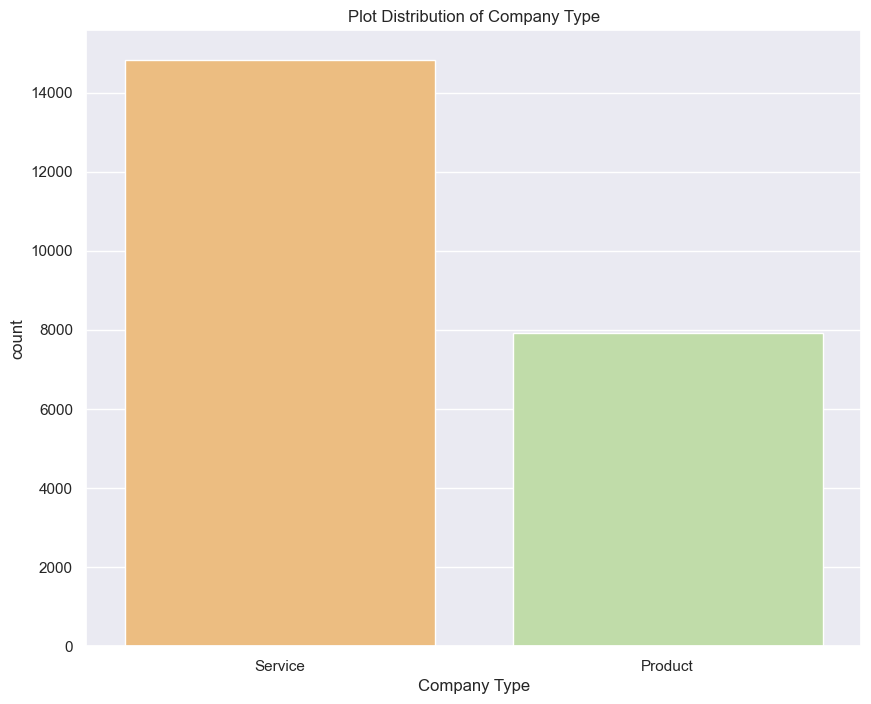

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(x="Company Type",data=dt,palette="Spectral")
plt.title("Plot Distribution of Company Type")
plt.show()

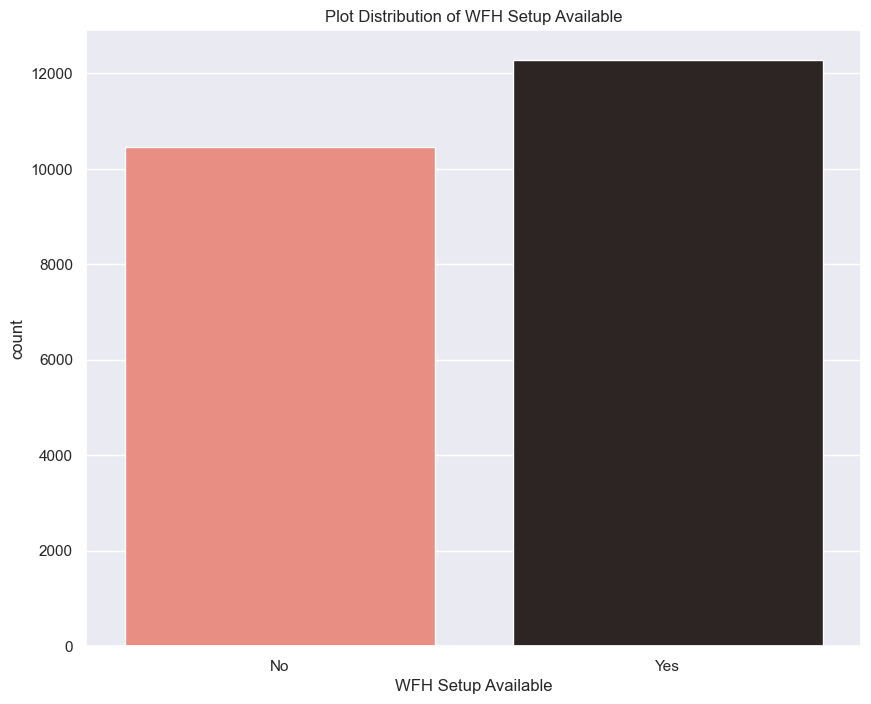

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(x="WFH Setup Available",data=dt,palette="dark:salmon_r")
plt.title("Plot Distribution of WFH Setup Available")
plt.show()

In [20]:
burn_st=dt.loc[:,'Date of Joining':'Burn Rate']
burn_st=burn_st.select_dtypes([int,float])
for i,col in enumerate(burn_st.columns):
  fig=px.histogram(burn_st,x=col,title="Plot Distribution of "+col,color_discrete_sequence=['indianred'])
  fig.update_layout(bargap=0.2)
  fig.show()

NameError: name 'dt' is not defined

In [21]:
fig=px.line(dt,y="Burn Rate",color="Designation",title="Burn rate on the Basis of Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.1)
fig.show()


NameError: name 'px' is not defined

In [ ]:
fig=px.line(dt,y="Burn Rate",color="Gender",title="Burn rate on the Basis of Gender",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()

In [15]:
fig=px.line(dt,y="Mental Fatigue Score",color="Designation",title="Mental Fatigue Score Vs Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()


NameError: name 'px' is not defined

In [16]:
sns.relplot(
    data=dt, x="Designation", y="Mental Fatigue Score", col="Company Type",
    hue="Company Type", size="Burn Rate", style="Gender",
    palette=["g","r"],sizes=(50,200)
)

NameError: name 'sns' is not defined

In [29]:
from sklearn import preprocessing
Label_encode=preprocessing.LabelEncoder()

In [30]:
dt['GenderLabel']=Label_encode.fit_transform(dt['Gender'].values)
dt['Company_TypeLabel']=Label_encode.fit_transform(dt['Company Type'].values)
dt['WFH_Setup_AvailableLabel']=Label_encode.fit_transform(dt['WFH Setup Available'].values)


In [31]:
gn=dt.groupby('Gender')
gn=gn['GenderLabel']
gn.first()


Gender
Female    0
Male      1
Name: GenderLabel, dtype: int32

In [32]:
gn=dt.groupby('Company Type')
gn=gn['Company_TypeLabel']
gn.first()


Company Type
Product    0
Service    1
Name: Company_TypeLabel, dtype: int32

In [33]:
gn=dt.groupby('WFH Setup Available')
gn=gn['WFH_Setup_AvailableLabel']
gn.first()

dt.tail(10)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,GenderLabel,Company_TypeLabel,WFH_Setup_AvailableLabel
22740,2008-09-05,Female,Product,No,3,6.0,7.300000,0.550000,0,0,0
22741,2008-01-07,Male,Product,No,2,5.0,6.000000,0.452005,1,0,0
22742,2008-07-28,Male,Product,No,3,5.0,8.100000,0.690000,1,0,0
22743,2008-12-15,Female,Product,Yes,1,3.0,6.000000,0.480000,0,0,1
22744,2008-05-27,Male,Product,No,3,7.0,6.200000,0.540000,1,0,0
22745,2008-12-30,Female,Service,No,1,3.0,5.728188,0.410000,0,1,0
22746,2008-01-19,Female,Product,Yes,3,6.0,6.700000,0.590000,0,0,1
22747,2008-11-05,Male,Service,Yes,3,7.0,5.728188,0.720000,1,1,1
22748,2008-01-10,Female,Service,No,2,5.0,5.900000,0.520000,0,1,0
22749,2008-01-06,Male,Product,No,3,6.0,7.800000,0.610000,1,0,0


In [34]:
cols=['Designation','Resource Allocation','Mental Fatigue Score',
      'GenderLabel','Company_TypeLabel','WFH_Setup_AvailableLabel']
x=dt[cols]
y=dt['Burn Rate']

print(x)

print(y)

       Designation  Resource Allocation  Mental Fatigue Score  GenderLabel  \
0                2             3.000000              3.800000            0   
1                1             2.000000              5.000000            1   
2                2             4.481398              5.800000            0   
3                1             1.000000              2.600000            1   
4                3             7.000000              6.900000            0   
...            ...                  ...                   ...          ...   
22745            1             3.000000              5.728188            0   
22746            3             6.000000              6.700000            0   
22747            3             7.000000              5.728188            1   
22748            2             5.000000              5.900000            0   
22749            3             6.000000              7.800000            1   

       Company_TypeLabel  WFH_Setup_AvailableLabel  
0         

In [35]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
x_pca=pca.fit_transform(x)
print("PCA shape of X is: ",x_pca.shape,"and original shape is: ",x.shape)
print("% of Importance of Selected Features is: ",pca.explained_variance_ratio_)
print("The number of features selected through PCA is: ",pca.n_components_)


PCA shape of X is:  (22750, 4) and original shape is:  (22750, 6)
% of Importance of Selected Features is:  [0.78371089 0.11113597 0.03044541 0.02632422]
The number of features selected through PCA is:  4


In [36]:
from sklearn.model_selection import train_test_split
x_train_pca,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.25,random_state=10)

In [37]:
print(x_train_pca.shape,x_test.shape,y_train.shape,y_test.shape)


(17062, 4) (5688, 4) (17062,) (5688,)


In [38]:
from sklearn.metrics import r2_score


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming x_train_pca, y_train, x_test, and y_test are already defined

# Initialize and fit the model
rf_model = RandomForestRegressor()
rf_model.fit(x_train_pca, y_train)

# Make predictions on training data and calculate R-squared
train_pred_rf = rf_model.predict(x_train_pca)
train_r2 = r2_score(y_train, train_pred_rf)

# Make predictions on test data and calculate R-squared
test_pred_rf = rf_model.predict(x_test)
test_r2 = r2_score(y_test, test_pred_rf)

# Accuracy Score
print("Accuracy Score of Train Data: " + str(round(100 * train_r2, 4)) + " %")
print("Accuracy Score of Test Data: " + str(round(100 * test_r2, 4)) + " %")
print("RandomForestRegressor Performance Metrics\n")

# Make predictions on the test set
y_pred = rf_model.predict(x_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Accuracy Score of Train Data: 91.1859 %
Accuracy Score of Test Data: 83.92 %
RandomForestRegressor Performance Metrics

Mean Squared Error: 0.005929814862965252
Root Mean Squared Error: 0.07700529113616318
Mean Absolute Error: 0.056525140794273995
R-squared Score: 0.8392004713100146


In [43]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming x_train_pca, y_train, x_test, and y_test are already defined

# Initialize and fit the model
abr_model = AdaBoostRegressor()
abr_model.fit(x_train_pca, y_train)

# Make predictions on training data and calculate R-squared
train_pred_adaboost = abr_model.predict(x_train_pca)
train_r2 = r2_score(y_train, train_pred_adaboost)

# Make predictions on test data and calculate R-squared
test_pred_adaboost = abr_model.predict(x_test)
test_r2 = r2_score(y_test, test_pred_adaboost)

# Accuracy Score
print("Accuracy Score of Train Data: " + str(round(100 * train_r2, 4)) + " %")
print("Accuracy Score of Test Data: " + str(round(100 * test_r2, 4)) + " %")
print("AdaBoostRegressor Performance Metrics\n")

# Make predictions on the test set
y_pred = abr_model.predict(x_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Accuracy Score of Train Data: 77.6151 %
Accuracy Score of Test Data: 77.1881 %
AdaBoostRegressor Performance Metrics

Mean Squared Error: 0.008412346385242015
Root Mean Squared Error: 0.09171884422103244
Mean Absolute Error: 0.07266328008357206
R-squared Score: 0.7718813546149418
